In [1]:
## Load packages
library(ggplot2)
library(dplyr)
options(repr.plot.width=20, repr.plot.height=10)
snp.names <- readLines("../inputfiles/snp.names")
all.fst <- read.csv("outflank/outflank.csv")[,c(1,2,3,15)]
all.fst$LocusName <- gsub("\\.[0-9]+", "", all.fst$LocusName)
head(all.fst)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,LocusName,He,FST,OutlierFlag
,<chr>,<dbl>,<dbl>,<lgl>
1,232_pilon_2036,0.04067103,0.003074769,FALSE
2,335_pilon_972,0.03332376,0.015943825,FALSE
3,335_pilon_973,0.02344729,0.003532902,FALSE
4,341_pilon_1400,0.07420274,0.012091845,FALSE
5,536_pilon_3491,0.01947863,0.008973181,FALSE
6,794_pilon_11572,0.03760373,-0.001514511,FALSE


## Bayescan results

In [2]:
bayescan <- readLines("bayescan/bayescan.outliers.loci")
bayescan

[1] "98145_pilon_5343"   "185042_pilon_3632"  "257918_pilon_16155"
[4] "487936_pilon_47"    "487936_pilon_50"

## outFlank results

In [3]:
outflank <- readLines("outflank/outflank.outliers.loci")
outflank

[1] "22845_pilon_21316"    "25280_pilon_7009"     "38948_pilon_27399"   
 [4] "41950_pilon_50866"    "43953_pilon_6455"     "49150_pilon_108095"  
 [7] "55180_pilon_1698"     "59363_pilon_848"      "61086_pilon_2498"    
[10] "64444_pilon_21010"    "67749_pilon_4410"     "78696_pilon_35444"   
[13] "79362_pilon_8827"     "80652_pilon_1211"     "87121_pilon_5841"    
[16] "92013_pilon_10508"    "92487_pilon_569"      "98145_pilon_5343"    
[19] "102684_pilon_5263"    "103835_pilon_1643"    "110673_pilon_20700"  
[22] "113470_pilon_16504"   "120765_pilon_2031"    "132666_pilon_7217"   
[25] "134438_pilon_3107"    "134485_pilon_16567"   "135818_pilon_6357"   
[28] "139985_pilon_1404"    "142032_pilon_1347"    "147124_pilon_2431"   
[31] "147180_pilon_17454"   "148831_pilon_2574"    "181231_pilon_3961"   
[34] "183746_pilon_14459"   "185042_pilon_3632"    "186965_pilon_0_2535" 
[37] "187509_pilon_3816"    "187509_pilon_3822"    "188260_pilon_8854"   
[40] "200020_pilon_7057"    "202625_pilon_20075"   "207091_pilon_623"    
[43] "243056_pilon_3204"    "243628_pilon_3332"    "257918_pilon_16155"  
[46] "265933_pilon_1742"    "267657_pilon_1176"    "271640_pilon_737"    
[49] "275099_pilon_338"     "283038_pilon_5011"    "284542_pilon_1491"   
[52] "292802_pilon_14259"   "296530_pilon_0_16003" "487936_pilon_47"     
[55] "487936_pilon_50"

### Baypass results

In [4]:
baypass <- readLines("baypass/baypass.outliers.loci")
baypass

[1] "2508_pilon_1_6228"   "9784_pilon_16209"    "11109_pilon_0_9627" 
 [4] "11596_pilon_17128"   "17843_pilon_14110"   "20575_pilon_706"    
 [7] "27601_pilon_14553"   "29247_pilon_14539"   "37918_pilon_5372"   
[10] "38343_pilon_14739"   "43918_pilon_1316"    "48400_pilon_59645"  
[13] "56421_pilon_22802"   "70479_pilon_15101"   "73752_pilon_1_3577" 
[16] "87933_pilon_1351"    "91228_pilon_1890"    "94230_pilon_23398"  
[19] "96091_pilon_11444"   "102827_pilon_7466"   "102983_pilon_1123"  
[22] "107942_pilon_7235"   "108821_pilon_4384"   "119475_pilon_1_7526"
[25] "120504_pilon_6192"   "121264_pilon_6161"   "123135_pilon_1053"  
[28] "133274_pilon_8334"   "145033_pilon_1775"   "146594_pilon_1_109" 
[31] "146645_pilon_6987"   "149306_pilon_308"    "149609_pilon_959"   
[34] "153020_pilon_349"    "153512_pilon_132"    "161105_pilon_7928"  
[37] "161620_pilon_735"    "188085_pilon_0_1520" "194147_pilon_13602" 
[40] "198417_pilon_2344"   "204938_pilon_220"    "220975_pilon_2925"  
[43] "221767_pilon_1584"   "225438_pilon_12554"  "231377_pilon_4938"  
[46] "239201_pilon_920"    "242520_pilon_3777"   "247315_pilon_7544"  
[49] "249802_pilon_1496"   "260302_pilon_2507"   "266121_pilon_8402"  
[52] "271143_pilon_2991"   "271143_pilon_2996"   "271146_pilon_5418"  
[55] "274372_pilon_1158"   "276330_pilon_1836"   "289075_pilon_3166"  
[58] "293334_pilon_3311"

#### Are there any common loci?
outFLANK vs Baypass: nope

In [5]:
intersect(outflank, baypass)

character(0)

outFLANK vs Bayescan: all 5 of Bayescan

In [6]:
intersect(outflank, bayescan)

[1] "98145_pilon_5343"   "185042_pilon_3632"  "257918_pilon_16155"
[4] "487936_pilon_47"    "487936_pilon_50"

In [7]:
all.fst$outlier <- "neutral"
all.fst$outlier[all.fst$LocusName %in% baypass] <- "baypass"
all.fst$outlier[all.fst$LocusName %in% outflank] <- "outflank"
all.fst$outflank <- all.fst$outlier == "outflank"
all.fst$baypass <- all.fst$outlier == "baypass"
all.fst$bayescan <- all.fst$LocusName %in% bayescan
all.fst$outlier <- ordered(all.fst$outlier, levels = c("neutral", "baypass", "outflank"))

all.fst %<>%
  mutate(order = 
    case_when(
      (outlier == "neutral") ~ 1,
      (outlier == "baypass") ~ 2,
      (outlier == "outflank") ~ 3,
      (outlier == "both") ~ 4,
    )
  ) %>%
  arrange(order)
head(all.fst)

,LocusName,He,FST,OutlierFlag,outlier,outflank,baypass,bayescan,order
,<chr>,<dbl>,<dbl>,<lgl>,<ord>,<lgl>,<lgl>,<lgl>,<dbl>
1,232_pilon_2036,0.04067103,0.003074769,FALSE,neutral,FALSE,FALSE,FALSE,1
2,335_pilon_972,0.03332376,0.015943825,FALSE,neutral,FALSE,FALSE,FALSE,1
3,335_pilon_973,0.02344729,0.003532902,FALSE,neutral,FALSE,FALSE,FALSE,1
4,341_pilon_1400,0.07420274,0.012091845,FALSE,neutral,FALSE,FALSE,FALSE,1
5,536_pilon_3491,0.01947863,0.008973181,FALSE,neutral,FALSE,FALSE,FALSE,1
6,794_pilon_11572,0.03760373,-0.001514511,FALSE,neutral,FALSE,FALSE,FALSE,1


In [8]:
putatives <- all.fst %>% filter(He >= 0.1 & (outflank | baypass))
length(putatives$LocusName)
putatives$LocusName

[1] 8

[1] "55180_pilon_1698"  "78696_pilon_35444" "92013_pilon_10508"
[4] "98145_pilon_5343"  "243628_pilon_3332" "275099_pilon_338" 
[7] "487936_pilon_47"   "487936_pilon_50"

In [9]:
corrected.names <- strsplit(putatives$LocusName, "_")
corr.names <- FALSE

Replacing the final underscore with a whitespace will make the locus and positions names suitable for isolation using `vcftools --exclude-positions` and `--positions`.

In [10]:
for(i in 1:length(corrected.names)){
    .string <- corrected.names[[i]]
    strlen <- length(.string)
    chr <- paste(.string[1:(strlen-1)], collapse = "_")
    corr.names[i] <- paste(chr, .string[strlen], sep = " ")
}
corr.names

[1] "55180_pilon 1698"  "78696_pilon 35444" "92013_pilon 10508"
[4] "98145_pilon 5343"  "243628_pilon 3332" "275099_pilon 338" 
[7] "487936_pilon 47"   "487936_pilon 50"

In [11]:
write.table(corr.names, file = "bft.outliers", row.names = F, col.names = F, quote = F)

## The plot

In [12]:
mycolors <- c("#bbbbbb","#ea3c00", "dodgerblue")

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


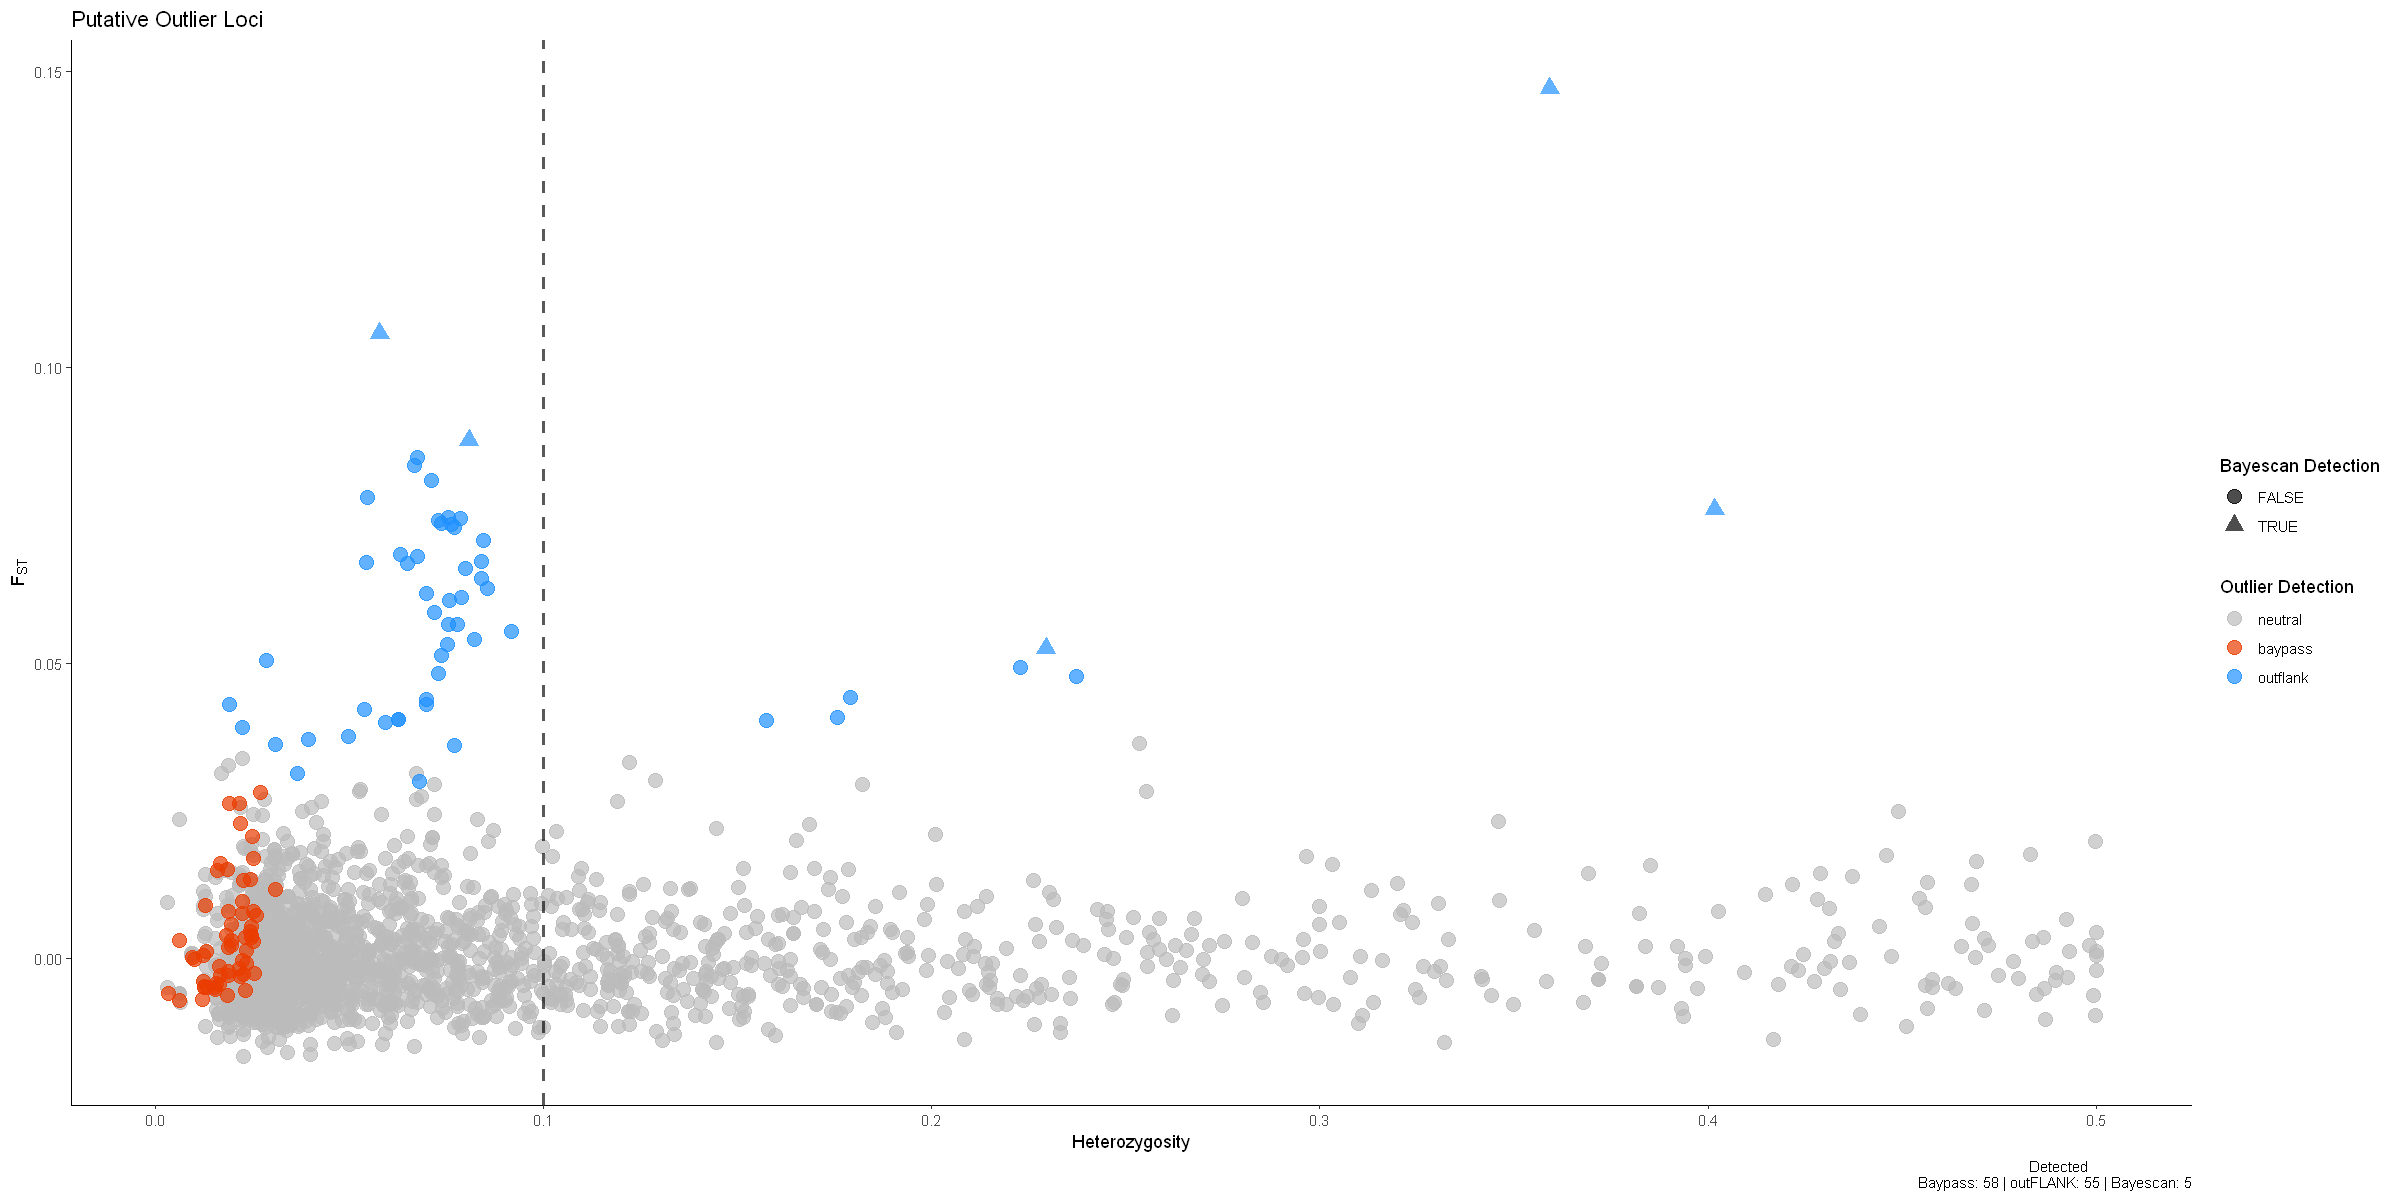

In [13]:
all.fst %>%
  ggplot(x = He, y = FST) +
  geom_point(aes(x = He, y = FST, col = outlier, shape = bayescan), alpha = 0.7,  size = 4) +
  geom_vline(xintercept = 0.1, alpha = 0.65, linetype = "dashed", size = 1) +
  labs(title = "Putative Outlier Loci", x = "Heterozygosity", y = expression("F"["ST"]), color = "Outlier Detection", shape = "Bayescan Detection", caption = paste0("Detected                          \n","Baypass: ", length(baypass), " | ", "outFLANK: ", length(outflank), " | ", "Bayescan: ", length(bayescan))) +
  scale_color_manual(values = mycolors) +
  scale_shape_manual(values = c(19, 17)) +
  theme_classic()

In [15]:
ggsave("outliers.jpg", height = 6, width = 12, units = "in", dpi = 400)